<a href="https://colab.research.google.com/github/ZacharyFry1/DD-Science-Cohort15/blob/main/Project_3_Chinook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing sql lite.

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


Checking the version.

In [ ]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


Unzipping the File.

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!unzip -u chinook.zip


Archive:  chinook.zip


In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 00:15 .
drwxr-xr-x 1 root root   4096 Oct 29 00:14 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 00:15 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 25 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 25 13:20 sample_data


In [ ]:
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

### Basic Queries


#### SELECT (with * and with column names)


What was the track count for each artist?

> Add blockquote



In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
SELECT artists.Name, artists.ArtistId, albums.ArtistId, albums.Title, albums.AlbumId, tracks.AlbumId, COUNT(tracks.TrackId) AS `Track Count`, tracks.Name
FROM artists
JOIN albums
  ON artists.ArtistId = albums.ArtistId
JOIN tracks
  ON albums.AlbumId = tracks.AlbumID
GROUP BY artists.ArtistId
ORDER BY artists.ArtistId
LIMIT 20;


Name                         ArtistId  ArtistId  Title                                             AlbumId  AlbumId  Track Count  Name                                   
---------------------------  --------  --------  ------------------------------------------------  -------  -------  -----------  ---------------------------------------
AC/DC                        1         1         For Those About To Rock We Salute You             1        1        18           For Those About To Rock (We Salute You)
Accept                       2         2         Balls to the Wall                                 2        2        4            Balls to the Wall                      
Aerosmith                    3         3         Big Ones                                          5        5        15           Walk On Water                          
Alanis Morissette            4         4         Jagged Little Pill                                6        6        13           All I Really Want   

In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
SELECT COUNT(1)
FROM albums
LIMIT 10

COUNT(1)
--------
347     


In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
SELECT *
FROM playlist_track
LIMIT 10

PlaylistId  TrackId
----------  -------
1           3402   
1           3389   
1           3390   
1           3391   
1           3392   
1           3393   
1           3394   
1           3395   
1           3396   
1           3397   


In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
SELECT COUNT(1)
FROM playlist_track
LIMIT 10

COUNT(1)
--------
8715    


Getting an idea about what's in each table. Question: What rows and columns are contained in each table?

In [ ]:
# Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
SELECT *
FROM albums
LIMIT 10


AlbumId  Title                                  ArtistId
-------  -------------------------------------  --------
1        For Those About To Rock We Salute You  1       
2        Balls to the Wall                      2       
3        Restless and Wild                      2       
4        Let There Be Rock                      1       
5        Big Ones                               3       
6        Jagged Little Pill                     4       
7        Facelift                               5       
8        Warner 25 Anos                         6       
9        Plays Metallica By Four Cellos         7       
10       Audioslave                             8       


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
LIMIT 10

ArtistId  Name                
--------  --------------------
1         AC/DC               
2         Accept              
3         Aerosmith           
4         Alanis Morissette   
5         Alice In Chains     
6         Antônio Carlos Jobim
7         Apocalyptica        
8         Audioslave          
9         BackBeat            
10        Billy Cobham        


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM media_types
LIMIT 10

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
LIMIT 10

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             
7        Latin             
8        Reggae            
9        Pop               
10       Soundtrack        


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM playlists
LIMIT 10

PlaylistId  Name        
----------  ------------
1           Music       
2           Movies      
3           TV Shows    
4           Audiobooks  
5           90’s Music  
6           Audiobooks  
7           Movies      
8           Music       
9           Music Videos
10          TV Shows    


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
LIMIT 10

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99     
2        Balls to the Wall                        2        2            1                                                                                342562        5510424   0.99     
3        Fast As a Shark                          3        2            1        F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                     230619        3990994   0.99     
4        Restless and Wild                        3        2     

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
LIMIT 10

ArtistId  Name                
--------  --------------------
1         AC/DC               
2         Accept              
3         Aerosmith           
4         Alanis Morissette   
5         Alice In Chains     
6         Antônio Carlos Jobim
7         Apocalyptica        
8         Audioslave          
9         BackBeat            
10        Billy Cobham        


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
LIMIT 10

ArtistId  Name                
--------  --------------------
1         AC/DC               
2         Accept              
3         Aerosmith           
4         Alanis Morissette   
5         Alice In Chains     
6         Antônio Carlos Jobim
7         Apocalyptica        
8         Audioslave          
9         BackBeat            
10        Billy Cobham        


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices


InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34                   Stuttgart                          Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14                          Oslo                               Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63                           Brussels                           Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW                            Edmonton             AB            Canada          T6G 2C7            8.91 
5          23          2009-

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoice_items
LIMIT 10

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
1              1          2        0.99       1       
2              1          4        0.99       1       
3              2          6        0.99       1       
4              2          8        0.99       1       
5              2          10       0.99       1       
6              2          12       0.99       1       
7              3          16       0.99       1       
8              3          20       0.99       1       
9              3          24       0.99       1       
10             3          28       0.99       1       


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
LIMIT 10

CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------
1           Luís       Gonçalves    Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170       São José dos Campos  SP     Brazil          12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br      3           
2           Leonie     Köhler                                                         Theodor-Heuss-Straße 34               Stuttgart                   Germany         70174       +49 0711 2842222                        leo

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
LIMIT 10

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

#### WHERE


What employees are from New Mexico? 0? What about California? It would appear there are only 8 employees and they all are from Canada...



In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
WHERE State = 'AB'

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

#### AND


How many customers from the USA had bills of more than $5? The answer is 91.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM invoices
WHERE BillingCountry = 'USA' AND 'total' > 5.00

COUNT(*)
--------
91      


#### OR

How many tracks have either a purchased AAC audio file media type or a protected MPEG-4 audio type? The answer is 221.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM tracks
WHERE MediaTypeId = '4' OR MediaTypeId = '3'

COUNT(*)
--------
221     


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM media_types

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


#### LIKE (with % or _ wildcard)


How many artist names start with a Z? None. What about M? 20. What about A? 26.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT Name
FROM artists

Name                                                                                 
-------------------------------------------------------------------------------------
AC/DC                                                                                
Accept                                                                               
Aerosmith                                                                            
Alanis Morissette                                                                    
Alice In Chains                                                                      
Antônio Carlos Jobim                                                                 
Apocalyptica                                                                         
Audioslave                                                                           
BackBeat                                                                             
Billy Cobham                                          

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(Name) as 'Distinct Names'
FROM artists
WHERE Name LIKE 'A%'

Distinct Names
--------------
26            


#### BETWEEN


How many tracks were at between 250K - 300K milliseconds or 5000000 - 550K Bytes?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM tracks
WHERE Milliseconds BETWEEN 250000 AND 300000

COUNT(*)
--------
779     


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM tracks
WHERE Bytes BETWEEN 5000000 AND 5500000

COUNT(*)
--------
143     


#### LIMIT


What are the names of 10 tracks?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
LIMIT 10

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99     
2        Balls to the Wall                        2        2            1                                                                                342562        5510424   0.99     
3        Fast As a Shark                          3        2            1        F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                     230619        3990994   0.99     
4        Restless and Wild                        3        2     

### Sorting and Grouping


#### ORDER BY


What were the 10 biggest total amounts from the invoices table?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
ORDER BY total DESC
LIMIT 10

InvoiceId  CustomerId  InvoiceDate          BillingAddress                        BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ------------------------------------  -----------  ------------  --------------  -----------------  -----
404        6           2013-11-13 00:00:00  Rilská 3174/6                         Prague                     Czech Republic  14300              25.86
299        26          2012-08-05 00:00:00  2211 W Berry Street                   Fort Worth   TX            USA             76110              23.86
96         45          2010-02-18 00:00:00  Erzsébet krt. 58.                     Budapest                   Hungary         H-1073             21.86
194        46          2011-04-28 00:00:00  3 Chatham Street                      Dublin       Dublin        Ireland                            21.86
89         7           2010-01-18 00:00:00  Rotenturmstraße 4, 1010 Innere Stadt  Vienne            

#### DISTINCT


There are 275 distinct artists.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT ArtistID) as 'Distinct Artists'
FROM artists

Distinct Artists
----------------
275             


#### GROUP BY


What is the ablum ID of artists 3? Answer: 5. What about artists 3-20? Results below.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT Albumid, Artistid, Title
FROM albums
WHERE Artistid BETWEEN 3 and 20
GROUP BY Artistid
ORDER BY Artistid ASC
LIMIT 20

AlbumId  ArtistId  Title                                           
-------  --------  ------------------------------------------------
5        3         Big Ones                                        
6        4         Jagged Little Pill                              
7        5         Facelift                                        
8        6         Warner 25 Anos                                  
9        7         Plays Metallica By Four Cellos                  
10       8         Audioslave                                      
12       9         BackBeat Soundtrack                             
13       10        The Best Of Billy Cobham                        
14       11        Alcohol Fueled Brewtality Live! [Disc 1]        
16       12        Black Sabbath                                   
18       13        Body Count                                      
19       14        Chemical Wedding                                
20       15        The Best Of Buddy Guy - The M

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT Albumid, Artistid, Title
FROM albums
WHERE Title LIKE '_a%'
GROUP BY Artistid
ORDER BY Artistid DESC
LIMIT 10

AlbumId  ArtistId  Title                                               
-------  --------  ----------------------------------------------------
327      257       Bach: Orchestral Suites Nos. 1 - 4                  
325      255       Bartok: Violin & Viola Concertos                    
323      253       Carried to Dust (Bonus Track Version)               
321      252       Back to Black                                       
309      244       Palestrina: Missa Papae Marcelli & Allegri: Miserere
302      236       Mascagni: Cavalleria Rusticana                      
300      234       Bach: The Brandenburg Concertos                     
297      231       Bach: Toccata & Fugue in D Minor                    
295      229       Carmina Burana                                      
293      227       Pavarotti's Opera Made Easy                         


### Aggregates


#### MAX


What was the most expensive track in the trakcs table? Answer: $1.99.


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(UnitPrice) as 'Max_Price'
FROM tracks


Max_Price
---------
1.99     


#### MIN


What was the least expensive track in the trakcs table? Answer: $0.99.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MIN(UnitPrice) as 'Min_Price'
FROM tracks


Min_Price
---------
0.99     


#### SUM


What is the sum of all the tracks purchased in the tracks table? Answer: $3680.969

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(UnitPrice) as 'Sum_Price'
FROM tracks


Sum_Price      
---------------
3680.9699999997


#### AVG


What is the average of all the tracks purchased in the tracks table? Answer: $1.05

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT AVG(UnitPrice) as 'Sum_Price'
FROM tracks

Sum_Price       
----------------
1.05080502426483


#### COUNT


How many different artists are there? Answer: There are 275 distinct artists.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT ArtistID)
FROM artists


COUNT(DISTINCT ArtistID)
------------------------
275                     


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT ArtistID) as 'Distinct Artists'
FROM artists

Distinct Artists
----------------
275             


### Plots

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


connection = sqlite3.connect('chinook.db')
query = "SELECT * FROM tracks"
cursor = connection.execute(query)
results = cursor.fetchall()

tracks_df = pd.DataFrame(results, columns=[description[0] for description in cursor.description])
tracks_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502
TrackId,1,2,3,4,5,6,7,8,9,10,...,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503
Name,For Those About To Rock (We Salute You),Balls to the Wall,Fast As a Shark,Restless and Wild,Princess of the Dawn,Put The Finger On You,Let's Get It Up,Inject The Venom,Snowballed,Evil Walks,...,"Symphony No. 2, Op. 16 - ""The Four Temperamen...","24 Caprices, Op. 1, No. 24, for Solo Violin, i...","Étude 1, In C Major - Preludio (Presto) - Liszt","Erlkonig, D.328","Concerto for Violin, Strings and Continuo in G...",Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,"String Quartet No. 12 in C Minor, D. 703 ""Quar...","L'orfeo, Act 3, Sinfonia (Orchestra)","Quintet for Horn, Violin, 2 Violas, and Cello ...",Koyaanisqatsi
AlbumId,1,2,3,3,3,1,1,1,1,1,...,338,339,340,341,342,343,344,345,346,347
MediaTypeId,1,2,2,2,2,1,1,1,1,1,...,2,2,4,2,4,2,2,2,2,2
GenreId,1,1,1,1,1,1,1,1,1,1,...,24,24,24,24,24,24,24,24,24,10
Composer,"Angus Young, Malcolm Young, Brian Johnson",None,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...","F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Deaffy & R.A. Smith-Diesel,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson",...,Carl Nielsen,Niccolò Paganini,None,None,Pietro Antonio Locatelli,None,Franz Schubert,Claudio Monteverdi,Wolfgang Amadeus Mozart,Philip Glass
Milliseconds,343719,342562,230619,252051,375418,205662,233926,210834,203102,263497,...,286998,265541,51780,261849,493573,286741,139200,66639,221331,206005
Bytes,11170334,5510424,3990994,4331779,6290521,6713451,7636561,6852860,6599424,8611245,...,4834785,4371533,2229617,4307907,16454937,4718950,2283131,1189062,3665114,3305164
UnitPrice,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99


Milliseconds Vs Bytes

In [ ]:
x = tracks_df['Milliseconds']
y = tracks_df['Bytes']

(array([ 25.,  47., 219., 664., 973., 669., 330., 148.,  72.,  55.,  31.,
         20.,  13.,   3.,   6.,   5.,   5.,   3.,   0.,   0.,   1.,   1.,
          1.,   7.,  30.,   4.,   1.,   0.,   0.,   0.,   1.,   1.,   4.,
          1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   5.,  22.,  94.,   3.,   2.,   3.,   1.,   4.,
         21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([1.07100000e+03, 5.39298200e+04, 1.06788640e+05, 1.59647460e+05,
        2.12506280e+05, 2.65365100e+05, 3.18223920e+05, 3.71082740e+05,
        4.23941560e+05, 4.76800380e+05, 5.29659200e+05, 5.82518020e+05,
        6.35376840e+05, 6.88235660e+05, 7.41094480e+05, 7.93953300e+05,
        8.46812120e+05, 8.9967

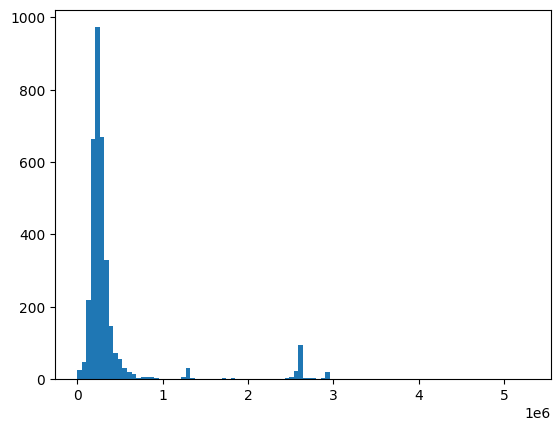

In [ ]:
plt.hist(x, 100)

Text(0, 0.5, 'BYTES')

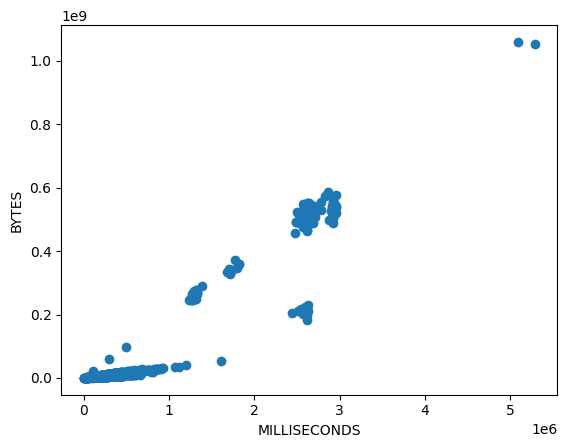

In [ ]:
plt.scatter(x, y)
plt.xlabel('MILLISECONDS')
plt.ylabel('BYTES')

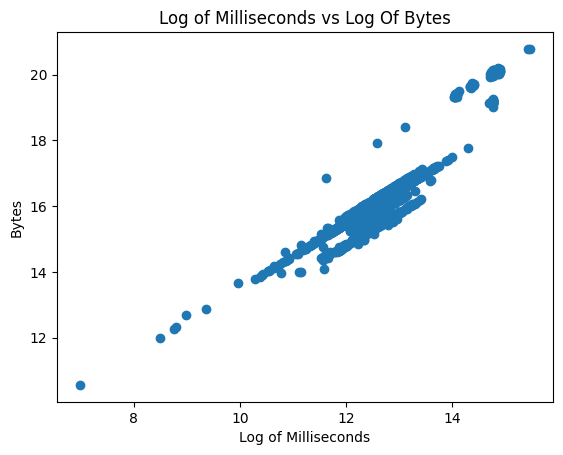

In [ ]:
tracks_df['log_milliseconds'] = np.log(tracks_df['Milliseconds'])
tracks_df['log_bytes'] = np.log(tracks_df['Bytes'])
plt.scatter(tracks_df['log_milliseconds'], tracks_df['log_bytes'])
plt.xlabel('Log of Milliseconds')
plt.ylabel('Bytes')
plt.title('Log of Milliseconds vs Log Of Bytes')
plt.show()

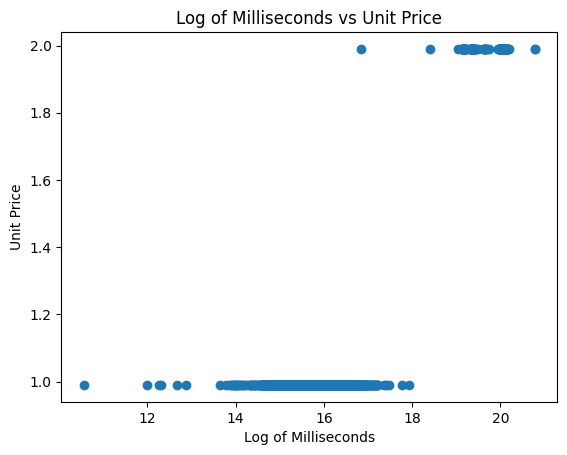

In [ ]:
tracks_df['log_bytes'] = np.log(tracks_df['Bytes'])
plt.scatter(tracks_df['log_bytes'], tracks_df['UnitPrice'],)
plt.xlabel('Log of Milliseconds')
plt.ylabel('Unit Price')
plt.title('Log of Milliseconds vs Unit Price')
plt.show()

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data